<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
# Load the dataset (Replace with the actual path)
file_path = "/content/EastWestAirlines.xlsx"  # Update with actual file path
xls = pd.ExcelFile(file_path)

# Check available sheet names
print(xls.sheet_names)

# Load the main dataset sheet (Update sheet name if required)
df = pd.read_excel(xls, sheet_name="data")


['Description', 'data']


In [ ]:
# Drop identifier column if present
df = df.drop(columns=["ID#"], errors="ignore")


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [ ]:
# Compute IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


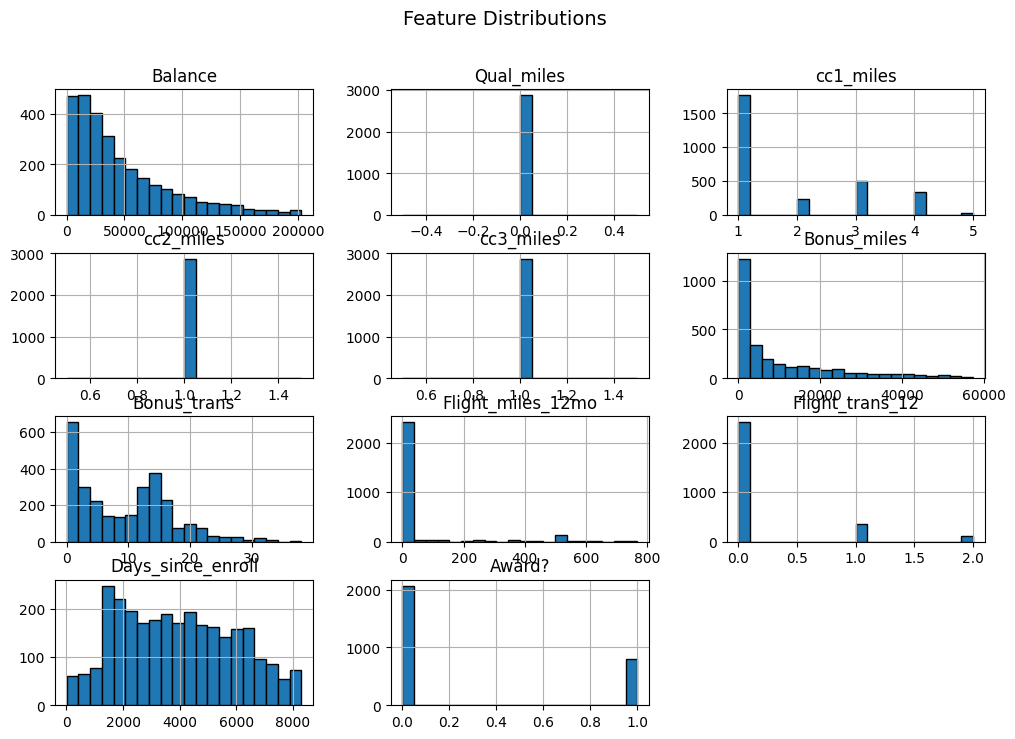

In [ ]:
# Plot histograms
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


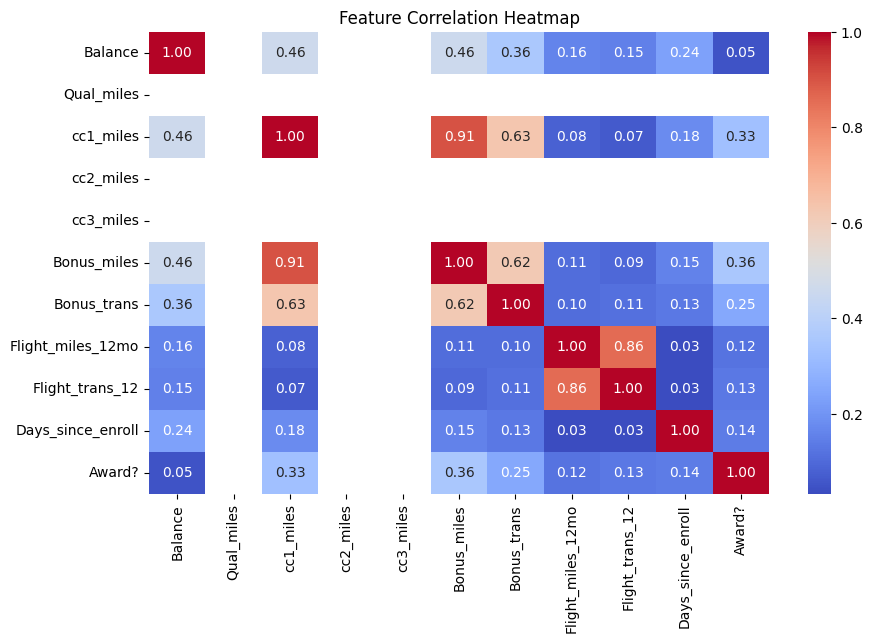

In [ ]:
# Heatmap to check feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


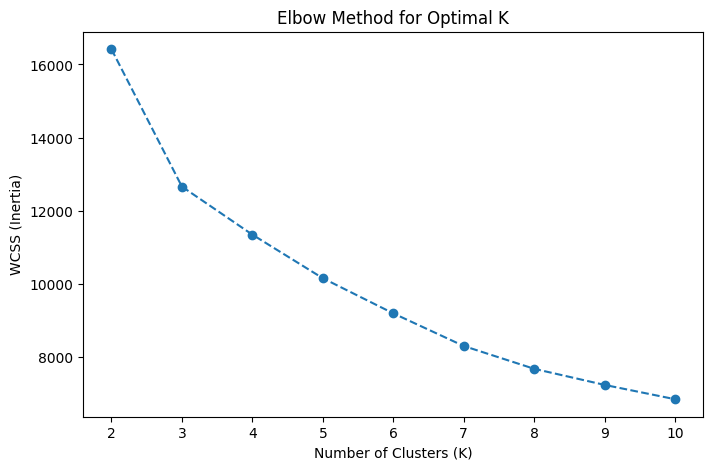

In [ ]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()


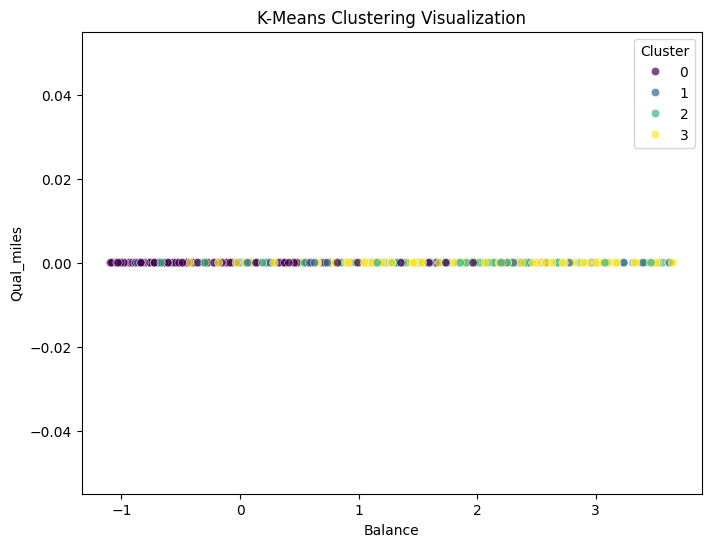

In [ ]:
# Assuming K=4 (update based on elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["Cluster_KMeans"], palette="viridis", alpha=0.7)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("K-Means Clustering Visualization")
plt.legend(title="Cluster")
plt.show()


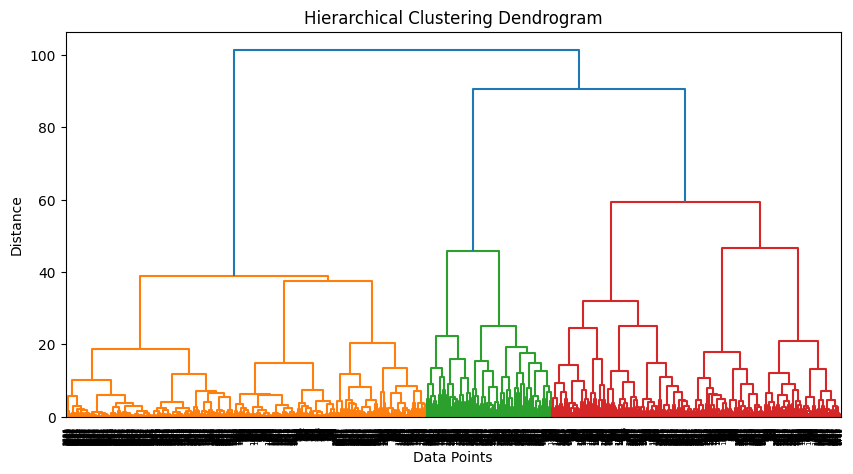

In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


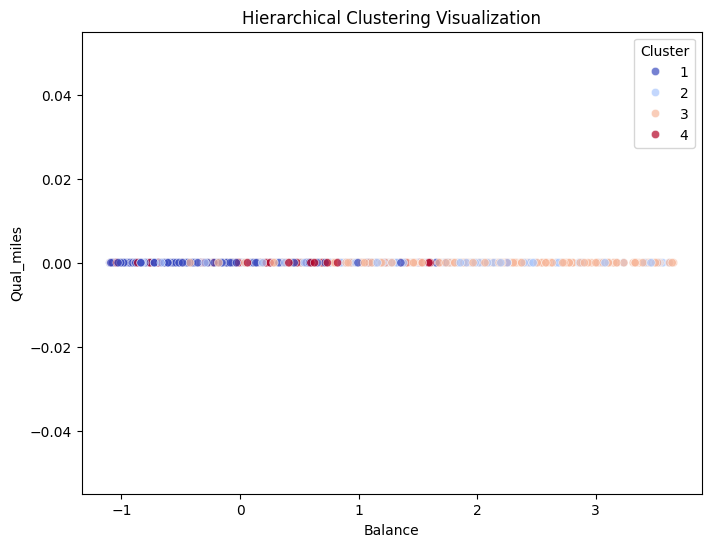

In [ ]:
# Assign clusters from hierarchical clustering
df["Cluster_Hierarchical"] = fcluster(linkage_matrix, optimal_k, criterion="maxclust")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["Cluster_Hierarchical"], palette="coolwarm", alpha=0.7)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Hierarchical Clustering Visualization")
plt.legend(title="Cluster")
plt.show()


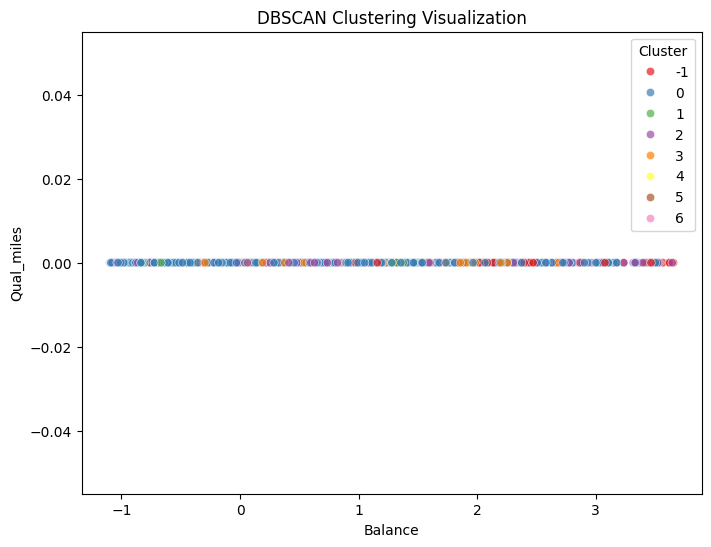

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters based on dataset
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["Cluster_DBSCAN"], palette="Set1", alpha=0.7)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("DBSCAN Clustering Visualization")
plt.legend(title="Cluster")
plt.show()


In [ ]:
silhouette_kmeans = silhouette_score(df_scaled, df["Cluster_KMeans"])
silhouette_hierarchical = silhouette_score(df_scaled, df["Cluster_Hierarchical"])

print(f"Silhouette Score - KMeans: {silhouette_kmeans}")
print(f"Silhouette Score - Hierarchical: {silhouette_hierarchical}")


Silhouette Score - KMeans: 0.32076573171912565
Silhouette Score - Hierarchical: 0.3017855590922621


K-Means is best suited for spherical clusters and requires an optimal
𝐾
K.

Hierarchical clustering provides a hierarchy, useful when the number of clusters is unknown.

DBSCAN is great for detecting outliers and density-based clusters.